## Aluno: Vinícius Oliveira Fernandes
## Atividade Semana 02 - Implementando uma rede simples (MLP) usando o Keras

In [15]:
%pip install keras

## Importação das Bibliotecas

- pandas, numpy: Usados para manipulação de dados e operações numéricas

- matplotlib, seaborn: Ferramentas para visualização de dados.

- tensorflow, keras: Bibliotecas para construção e treinamento de modelos de deep learning.

- sklearn: Biblioteca de aprendizado de máquina para dividir dados e calcular métricas como acurácia e F1-score.

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
import sklearn
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.metrics import BinaryAccuracy
from keras.losses import BinaryCrossentropy

In [55]:
# stroke_pred = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
# stroke_pred

In [18]:
personal_loan_modeling = pd.read_csv('/content/Bank_Personal_Loan_Modelling.csv')
personal_loan_modeling

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## Análise do Dataset

- info(): Exibe informações sobre o dataframe, incluindo tipos de dados e valores nulos.

- describe(): Fornece estatísticas descritivas dos dados numéricos, como média, desvio padrão, etc.

- corr(): Calcula a matriz de correlação entre variáveis numéricas, importante para entender relações entre variáveis e possíveis multicolinearidades.

In [43]:
personal_loan_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [44]:
personal_loan_modeling.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [45]:
personal_loan_modeling.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


A Função check(df): Cria um resumo das colunas do dataframe, incluindo tipo de dado, número de valores únicos e número de valores nulos. Isso ajuda a identificar possíveis problemas nas colunas.

In [21]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check

In [22]:
check(personal_loan_modeling)

,column,dtypes,nunique,sum_null
0,ID,int64,5000,0
1,Age,int64,45,0
2,Experience,int64,47,0
3,Income,int64,162,0
4,ZIP Code,int64,467,0
5,Family,int64,4,0
6,CCAvg,float64,108,0
7,Education,int64,3,0
8,Mortgage,int64,347,0
9,Personal Loan,int64,2,0


In [23]:
personal_loan_modeling.duplicated().sum()

0

Criação de gráficos de distribuição para as variáveis Age e Income usando seaborn. Isso ajuda a entender a distribuição das variáveis numéricas e verificar a presença de outliers.

<ipython-input-25-8c51f79d2481>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(personal_loan_modeling.Age)


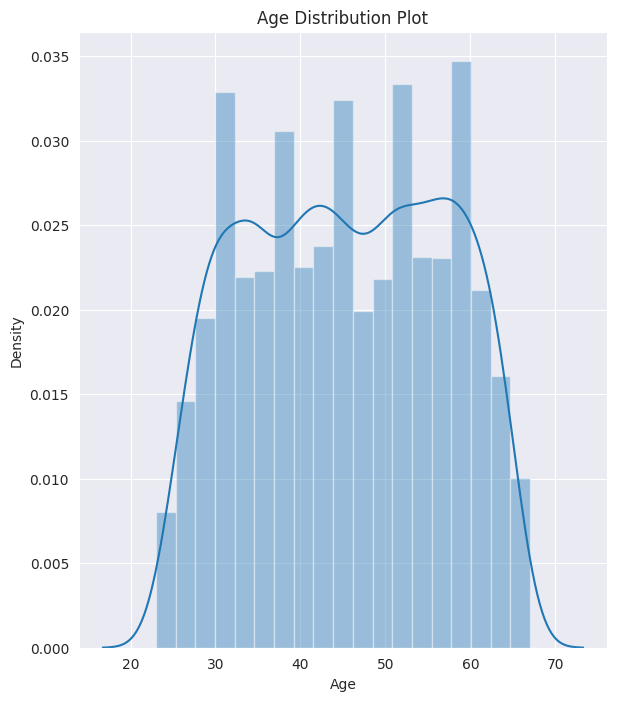

In [25]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('Age Distribution Plot')
sns.distplot(personal_loan_modeling.Age)

plt.show()

<ipython-input-47-6c6015afbeb4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(personal_loan_modeling.Income)


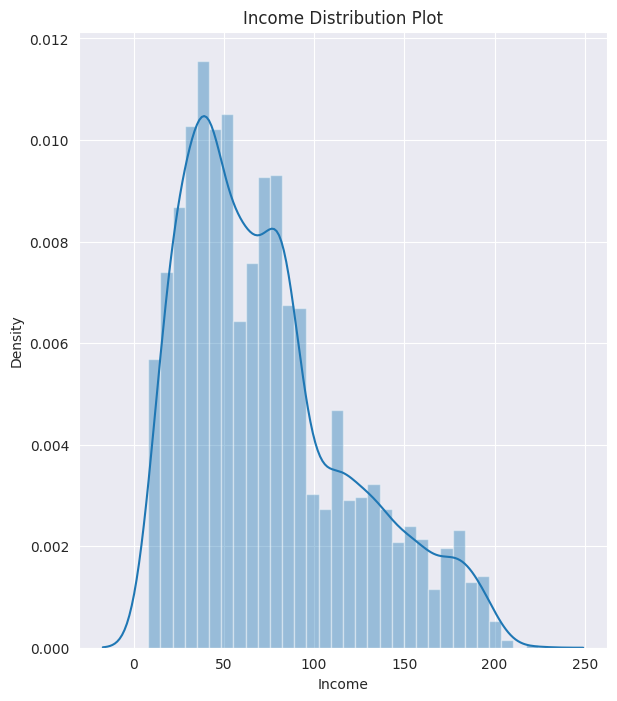

In [47]:
plt.figure(figsize=(15,8))
sns.set_style('darkgrid')
plt.subplot(1,2,1)
plt.title('Income Distribution Plot')
sns.distplot(personal_loan_modeling.Income)

plt.show()

In [33]:
personal_loan_modeling.dtypes

,0
ID,int64
Age,int64
Experience,int64
Income,int64
ZIP Code,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal Loan,int64


## Divisão do Conjunto de Dados em Treinamento e Teste


In [48]:

X = personal_loan_modeling.loc[:, ['Age', 'Mortgage', 'Experience', 'Income', 'Education']]
y = personal_loan_modeling.loc[:, 'Personal Loan']

print(X.shape, y.shape)

(5000, 5) (5000,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

## Criação e Compilação do Modelo

**Modelo Sequential:** Modelo de rede neural simples com uma única camada densa (1 unidade) e ativação sigmoid, apropriado para problemas de classificação binária.

**Adam:** Algoritmo de otimização usado para ajustar os pesos.

**BinaryCrossentropy:** Função de perda utilizada para classificação binária.
BinaryAccuracy: Métrica usada para avaliar a acurácia binária.

In [38]:
model = Sequential()

model.add(Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.compile(optimizer=Adam(),
              loss=BinaryCrossentropy(),
              metrics=[BinaryAccuracy(), 'accuracy'])

Treina o modelo por 50 épocas com batch size de 10. O verbose=1 permite ver o progresso do treinamento.

In [40]:
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1371 - binary_accuracy: 0.1371 - loss: 59.6697
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3214 - binary_accuracy: 0.3214 - loss: 25.4907
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6337 - binary_accuracy: 0.6337 - loss: 3.5438
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8876 - binary_accuracy: 0.8876 - loss: 1.2100
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8883 - binary_accuracy: 0.8883 - loss: 0.2844
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8977 - binary_accuracy: 0.8977 - loss: 0.2678
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9008 - binary_accuracy: 0.9008 - loss: 0.2571
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8953 - binary_accuracy: 0.8953 - loss: 0.2608
Epoch 9/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9076 - binary_accuracy: 0.9076 - los

In [41]:
# Predição dos rótulos do conjunto de teste
y_pred = model.predict(X_test).round()

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Converts probabilities to 0 or 1 for binary classification

In [49]:
print(y_pred[:10])  # First 10 predicted values
print(y_test[:10])  # First 10 actual values

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]]
398     0
3833    0
4836    0
4572    0
636     0
2545    0
1161    1
2230    1
148     0
2530    0
Name: Personal Loan, dtype: int64


## Cálculo da Acurácia e F1-Score
Calcula as métricas de avaliação do modelo: Acurácia e F1-Score. Essas métricas ajudam a entender o desempenho geral do modelo.

In [42]:
# Cálculo da acurácia e métrica F1
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

Acurácia: 0.9512
F1-Score: 0.6667


## Matriz de Confusão e Visualização

A matriz de confusão mostra o número de previsões corretas e incorretas para cada classe (0 ou 1).
O gráfico de calor visualiza a matriz de confusão, tornando mais fácil a interpretação dos resultados.

In [52]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1128   14]
 [  47   61]]


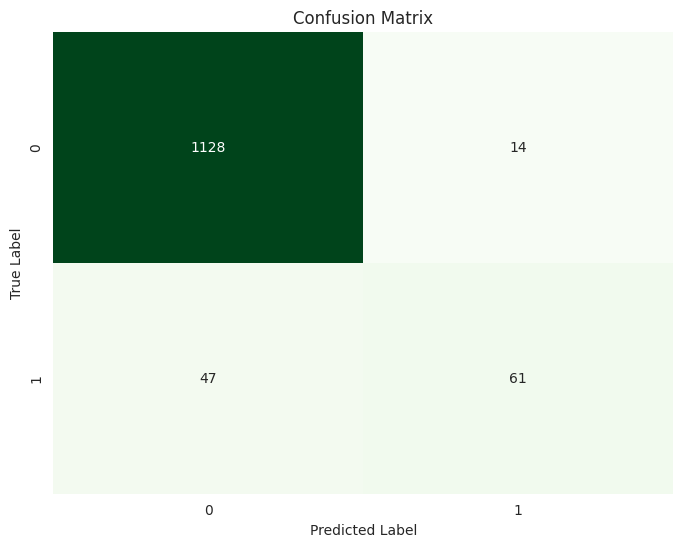

In [54]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()